# Ray Plane Intersect
###### *Finding the four corner coordinates of drone imagery*

## Objectives
- Find where a ray intersects a plane (Ray plane intersect)
- Plot the rays of a camera
- Rotate the rays of a camera (Rotation matrix)

Let's first import our libraries

In [1]:
from mpl_toolkits import mplot3d as a3
from mpl_toolkits.mplot3d import axes3d

#%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math as math

## Ray Plane Intersect
We can test if a camera with origin $r_{O}$ and direction $d$ intersects a plane with origin $P_{O}$ using the following formula.

Where $P$ is the point of interesect and $t$ is the distance between $r_{0}$ and $P$.

First we must define the oritentation of the plane, or the plane normal $n$. For this example $z$ is inthe up direction or $n = [0,0,1]$

$P = r_{O} + (d*t)$

$t=\frac{(P_{O}-r_{O})\bullet n}{d\bullet n}$ 

Below we have created two methods to calculate the Ray Plane Intersect and plot the data to help use visualize what's going on. 

<IPython.core.display.Javascript object>


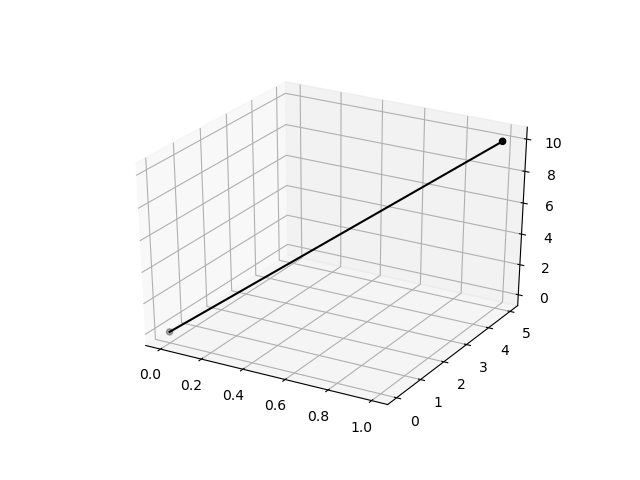

In [2]:
def plot(camera_origin, plane_origin, ax):  
    
    data = np.concatenate(([camera_origin], [plane_origin]))

    x, y, z = data.T

    ax.scatter3D(x, y, z, c="black", cmap='hsv');
    ax.plot(x, y, z, c="black")
    
def intersect(camera_origin, direction, plane_origin, normal):   

    # Zero (or close to it) means ray and plane are orthogonal (do not intersect)
    if np.dot(direction, normal) > 0.0001:
        t = (np.divide(np.dot(np.subtract(plane_origin, camera_origin), normal), np.dot(direction, normal)))
        p = np.add(camera_origin ,np.multiply(direction, t))
        
        #print(f"Camera {camera_origin} with direction {direction} intersects the plane at {p}. Orthogonal value is {np.dot(direction, normal)}")
        
        return True, p
    else:
        return False, -1

# Example
camera_origin = np.array([1, 5, 10])
plane_origin = np.array([0, 0, 0])

fig = plt.figure()
ax = plt.axes(projection='3d')
plot(camera_origin, plane_origin, ax)

# Understanding Direction
Direction $d$ is expressed as $[x,y,z]$ and represents the slop of the ray.

Rays continue infinitely in **both** directions. We can caluclate the dot product of the direction and plane normal to determine the direction. A positive value means the plane is in front of the ray and a negative value means the plane is behind the ray. In this case we are only concerned with the rays coming out of the camera (positive rays).

Lets explore the direction coordinates a little more.

## Changing one direction coordinate

In this example we pass an array of directions to see how changing the value of z impacts the direction of the ray. 

    # directions used
    directions = np.array([[0,0,20], [0,0,1], [0,0,0.1], [0,0,-1]])
    
As you can see from the code below, when xy are zero, any value passed to z results in the same direction. We can treat the direction as the slope of a line. Here we are saying, move the line 1 in z, will move the line 0 in xy. Therefore, any number passed to the z value will result in the same direction as long as xy are 0.

<IPython.core.display.Javascript object>


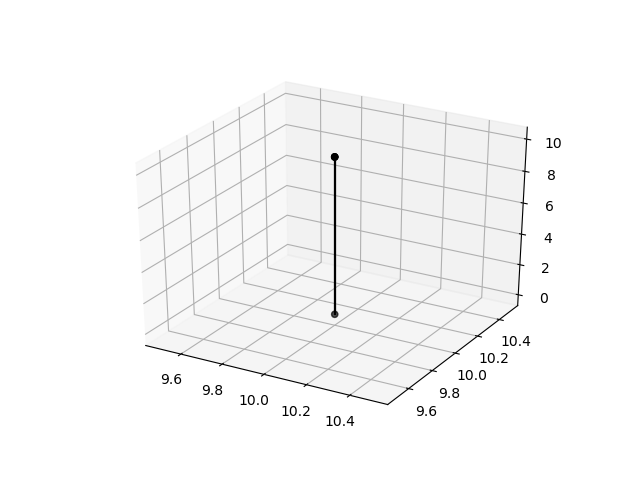

Do not intersect


In [3]:
camera_origin = np.array([10,10,10])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])

directions = np.array([[0,0,20], [0,0,1], [0,0,0.1], [0,0,-1]])

fig = plt.figure()
ax = plt.axes(projection='3d')

for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
    else:
        print("Do not intersect")

## Putting it to the test

We can test our slope theory by passing in the valueS

    directions = np.array([[0,1,1],[0,0,1]])
    
Here we would expect to see a straing line and a 45 degree line from the origin. 
    

<IPython.core.display.Javascript object>


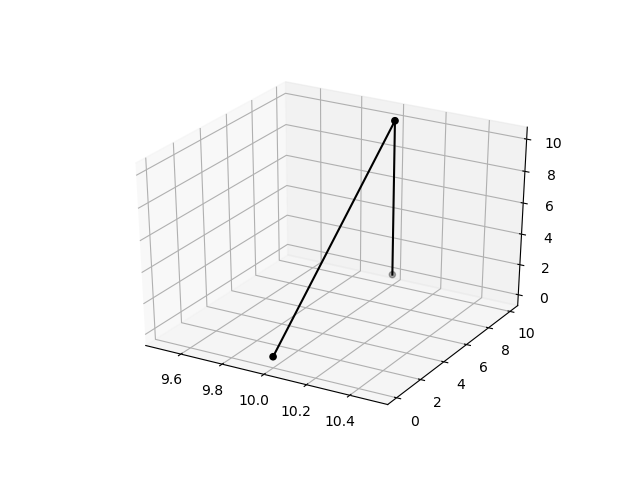

In [4]:
camera_origin = np.array([10,10,10])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])

directions = np.array([[0,1,1],[0,0,1]])

fig = plt.figure()
ax = plt.axes(projection='3d')

for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
    else:
        print("Do not intersect")

## Calculating FOV of DJI X5S Camera

Lets use what we've learned to calculate the four corners of the FOV of a drone.

In this scenario we have a drone at an altitude of 121.92 meters (400 ft) with an X5S camera pointing straight down. 

The X5S camera has a focal length $f$ of 15.1282 mm with pixel dimensions $p_{x,y}$ of 5280 x 3965. Since we know the pixel size $p_{\mu}$ of 3.31439, we can compute the FOV. 

First we need to get the sensor dimensions in $mm$.

$w,h=(p_{\mu}*0.001)*p_{x,y}$

Then we can calculate the field of view $FOV$ in the horizontal and vertical direction.

$FOV_{h}=2*\arctan( \frac{w*0.5}{f}*\frac{180}{\pi})$

$FOV_{v}=2*\arctan( \frac{h*0.5}{f}*\frac{180}{\pi})$

Let's do this programmatically. 

In [5]:
f = 15 
pixel_size = 3.31439 #micrometers
pixels_height = 3956
pixels_width = 5280
            
pixelmm = pixel_size * 0.001

sensor_height = pixels_height * pixelmm; #13.11172684
sensor_width = pixels_width * pixelmm; #17.4999792

pi = math.pi;

horizontal_fov = 2 * math.atan(sensor_width * 0.5 / f) * (180/pi); 
vertical_fov = 2 * math.atan(sensor_height * 0.5 / f) * (180/pi);

print(f"The camera has an FOV of {horizontal_fov} by {vertical_fov}")

The camera has an FOV of 60.51281504817404 by 47.21619401533894


Now that we know the FOV we can calculate the direction of the rays that represent the four corners of the FOV using the following formulas. 

$(\tan(\frac{fov_{h}}{2}),\tan(\frac{fov_{v}}{2}), 1)$

$(-\tan(\frac{fov_{h}}{2}),\tan(\frac{fov_{v}}{2}), 1)$

$(\tan(\frac{fov_{h}}{2}),-\tan(\frac{fov_{v}}{2}), 1)$

$(\tan(\frac{fov_{h}}{2}),-\tan(\frac{fov_{v}}{2}), 1)$

Let's plot these in our graph. 

<IPython.core.display.Javascript object>


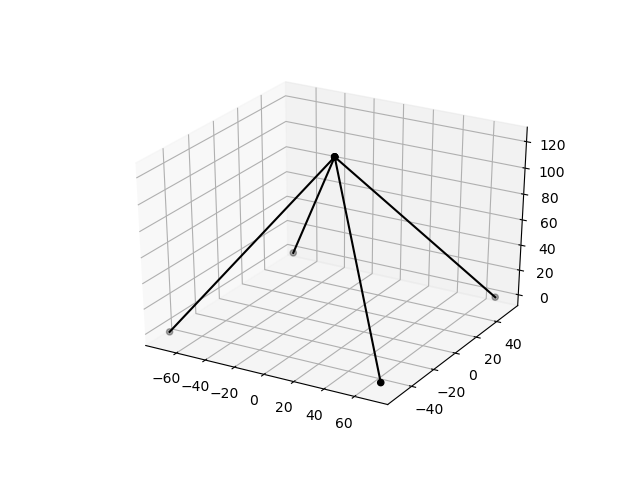

In [6]:
# Output should be in radians
horizontal = math.tan((horizontal_fov / 2)*(math.pi/180))
vertical = math.tan((vertical_fov / 2)*(math.pi/180))

directions = np.array([[horizontal, vertical, 1],
                       [-horizontal, vertical, 1], 
                       [horizontal, -vertical, 1], 
                       [-horizontal, -vertical, 1]])

camera_origin = np.array([0,0,121.92])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])

fig = plt.figure()
ax = plt.axes(projection='3d')

intersections = []
for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
        intersections.append(p)
    else:
        print("Do not intersect")

Per the DJI documentation the camera has a ratio of 4:3, so lets test if our four corners have the same ratio by dividing the horizontal length by the vertical length. 

*Note, that we could also get the expected ratio from the camera's pixel dimensions.*

The distance between $(x_1, y_1)$ and $(x_2, y_2)$ is given by

$d=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$

In [7]:
# Line 1
d0_x1 = intersections[2][0]
d0_y1 = intersections[2][1]
d0_x2 = intersections[0][0]
d0_y2 = intersections[0][1]

# Line 2
d1_x1 = intersections[2][0]
d1_y1 = intersections[2][1]
d1_x2 = intersections[3][0] 
d1_y2 = intersections[3][1]

distance_0 = math.sqrt( ((d0_x2-d0_x1)**2)+((d0_y2-d0_y1)**2) )
distance_1 = math.sqrt( ((d1_x2-d1_x1)**2)+((d1_y2-d1_y1)**2) )

print(f"vertical distance = {distance_0}")
print(f"horizontal distance = {distance_1}")
print(f"expected ratio = {4/3}")
print(f"actual ratio = {distance_1 / distance_0}")

vertical distance = 106.57211575551999
horizontal distance = 142.2398309376
expected ratio = 1.3333333333333333
actual ratio = 1.334681496461072


perfect, it looks like we have successfully plotted the FOV of a drone camera. 

## The World Isn't Flat
So far we have used a plane with a normal of $[0, 0, 1]$ or a flat surface with up in the $z$ direction. 

As, we know, or some of us know, the world isn't flat. In this next section, we work on calculating the 
plane normal of different surfaces and putting our ray intersect method to test on these surfaces.

We can calculate the plane normal using the following formula:

$n=((A-B) X (A-C)$

The code below will calculate the normal of a random plane and apply our ray intersect.

<IPython.core.display.Javascript object>


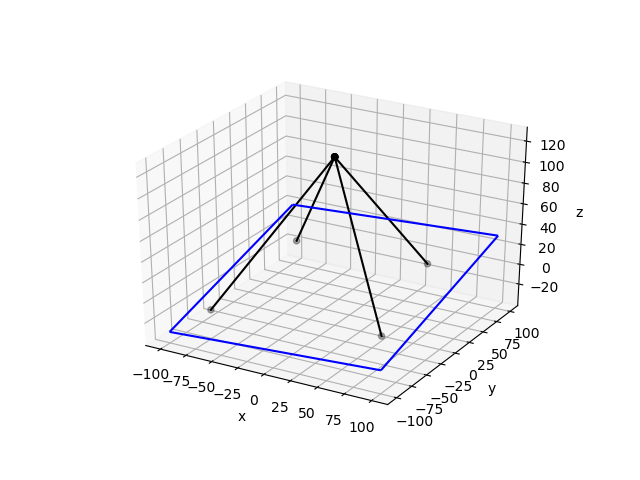

[-83.10967921 -62.26929753 -20.55390514]
[ 76.82530295 -57.56077623  -9.78067588]
[-66.20336051  49.60236632   8.42838995]
[62.15339624 46.56796127 15.37119409]


In [8]:
# We need an additional library. 
from random import randint

# Setup our plot.
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(xlabel='x', ylabel='y', zlabel='z')


z0 = randint(10,70)
z1 = randint(10,70)
# Let's create some data.
data = np.array([[[-100,100,z0],
                  [100,100,z1]],
                 [[-100,-100,-z1],
                  [100,-100,-z0]]])

#if randint(1,2) == 1:
#    data = data * -1

x,y,z = data.T
ax.plot_wireframe(x, y, z, color='blue')

# Calculate plane normal
a = data[0][0]
b = data[0][1]
c = data[1][0]
ab = np.subtract(a, b)
ac = np.subtract(a, c)
n = np.cross(ac, ab)

intersections = []
for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, n)
    print(p)
    
    if intersects:
        plot(camera_origin, p, ax)
        intersections.append(p)
    else:
        print("Do not intersect")


#### Digital Elevation Model (Under Development)

We can now handle planes in any direction, but haven't quite begun to model the world's surface. 

Let's take it a little further and work with a varying elevation surface.

First we'll need some helper functions.

In [9]:
# A utility function to calculate area  
# of triangle formed by (x1, y1),  
# (x2, y2) and (x3, y3) 
  
def area(x1, y1, x2, y2, x3, y3): 
  
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1)  
                + x3 * (y1 - y2)) / 2.0) 
  
  
# A function to check whether point P(x, y) 
# lies inside the triangle formed by  
# A(x1, y1), B(x2, y2) and C(x3, y3)  
def isInside(x1, y1, x2, y2, x3, y3, x, y): 
  
    # Calculate area of triangle ABC 
    A = area (x1, y1, x2, y2, x3, y3) 
  
    # Calculate area of triangle PBC  
    A1 = area (x, y, x2, y2, x3, y3) 
      
    # Calculate area of triangle PAC  
    A2 = area (x1, y1, x, y, x3, y3) 
      
    # Calculate area of triangle PAB  
    A3 = area (x1, y1, x2, y2, x, y) 
      
    # Check if sum of A1, A2 and A3  
    # is same as A 
    if(A == A1 + A2 + A3): 
        return True
    else: 
        return False

# A utility to calculate plane normal
def getNormal(a,b,c):
    ab = np.subtract(a, b)
    ac = np.subtract(a, c)
    n = np.cross(ac, ab)
    return n

# A utility to create elevation surfaces
def getElevationSurface(max, min,f):
    x = np.linspace(max, min, f)
    y = np.linspace(max, min, f)
    X, Y = np.meshgrid(x, y)

    # Let's create some random elevations
    Z = np.copy(X)
    for row in Z:
        for index, cell in enumerate(row):
            row[index] = randint(0,50)
    
    return X, Y, Z

<IPython.core.display.Javascript object>


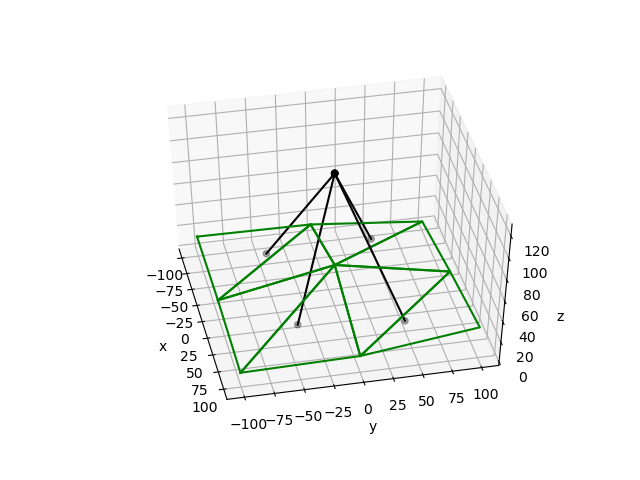

[62.64371496 46.93532886 14.53064671]
[-62.64371496  46.93532886  14.53064671]
[ 62.09851959 -46.52684536  15.46526845]
[-62.09851959 -46.52684536  15.46526845]
triangle 1: N: [    -0.   -100. -10000.], origin: [-100. -100.   16.]
[40.59994089 30.41919814 52.3200186 ]
[-51.4159157   38.52298532  33.77832546]
[ 47.78983702 -35.80617334  39.99446774]
[-63.51785822 -47.59027407  13.03211364]
triangle 2: N: [  2200.   2100. -10000.], origin: [ 0.  0. 37.]
[46.61762401 34.92790163 42.00397814]
[-44.19168059  33.1102819   46.16274323]
[ 56.35235271 -42.22157336  25.31585196]
[-52.84555639 -39.59413278  31.32750994]
triangle 1: N: [  -500.   2100. -10000.], origin: [   0. -100.   16.]
[57.0211256  42.72264638 24.16938278]
[-43.12252148  32.30922253  47.9955896 ]
[ 58.1921682  -43.60004117  22.16187881]
[-43.78893047 -32.80852442  46.85317282]
triangle 2: N: [ -2400.    200. -10000.], origin: [100.   0.  13.]
[45.67154275 34.21905741 43.62583366]
[-59.82963451  44.8269004   19.35479037]
[ 42.2

In [50]:
# Output should be in radians
horizontal = math.tan((horizontal_fov / 2)*(math.pi/180))
vertical = math.tan((vertical_fov / 2)*(math.pi/180))

# Plot FOV with plane normal of [0,0,1]
# Used as a reference, will delete later. 
directions = np.array([[horizontal, vertical, -1],
                       [-horizontal, vertical, -1], 
                       [horizontal, -vertical, -1], 
                       [-horizontal, -vertical, -1]])

camera_origin = np.array([0,0,121.92])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(xlabel='x', ylabel='y', zlabel='z')

# Create an elevation surface with random elevations.
X, Y, Z = getElevationSurface(-100, 100, 3)

dem = np.stack((X,Y,Z), axis=-1)
#print(dem)

row_count = len(dem) - 2
current_row = -1
while current_row < row_count:
    current_row += 1
    
    point_count = len(dem[current_row]) - 2
    current_point = -1
    while current_point < point_count:
        current_point += 1
        
        # First triangle
        a0 = dem[current_row][current_point]
        b0 = dem[current_row][current_point + 1]
        c0 = dem[current_row + 1][current_point]
        
        n = getNormal(a0, b0, c0)
        plane_origin = a0
        
        intersections = []
        for direction in directions:
            intersects, p = intersect(camera_origin, direction, plane_origin, n)
            print(p)
            
            if intersects:
                is_inside_triangle = isInside(a0[0], a0[1], b0[0], b0[1], c0[0], c0[1], p[0], p[1])
            
            if intersects and is_inside_triangle:
                plot(camera_origin, p, ax)
                intersections.append(p)
            #print(f"triangle 1: {a1} {b1} {c1}, Intersects: {intersects}, P: {p}, inTriangle: {is_inside_triangle}")
        print(f"triangle 1: N: {n}, origin: {plane_origin}")
        
        # Second Triangle
        a1 = dem[current_row ][current_point + 1]
        b1 = dem[current_row + 1][current_point]
        c1 = dem[current_row + 1][current_point + 1]
        
        # watch out, order matters here. 
        n = getNormal(b1, a1, c1)
        plane_origin = c1        
        
        intersections = []
        for direction in directions:
            intersects, p = intersect(camera_origin, direction, plane_origin, n)
            print(p)
            
            if intersects:
                is_inside_triangle = isInside(a1[0], a1[1], b1[0], b1[1], c1[0], c1[1], p[0], p[1])
            
            if intersects and is_inside_triangle:
                plot(camera_origin, p, ax)
                intersections.append(p)
            #print(f"triangle 2: {a1} {b1} {c1}, Intersects: {intersects}, P: {p}, inTriangle: {is_inside_triangle}")
        print(f"triangle 2: N: {n}, origin: {plane_origin}")
        
        # Plots the triangles being tested
        triangle0 = np.array([a0,b0,c0,a0])
        triangle1 = np.array([a1,b1,c1,a1])
        
        x0, y0, z0 = triangle0.T 
        ax.plot(x0, y0, z0, c="green")
        
        x1, y1, z1 = triangle1.T 
        ax.plot(x1, y1, z1, c="green")
            
    